In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_crimes = pd.read_csv('..//data/raw_data/neighbourhood-crime-rates - 4326.csv',
on_bad_lines='skip')
df_crimes

,_id,AREA_NAME,HOOD_ID,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,ASSAULT_2020,...,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,THEFTOVER_RATE_2023,THEFTOVER_RATE_2024,POPULATION_2024,geometry
0,1,South Eglinton-Davisville,174,55,56,66,73,74,62,74,...,4.915454,14.018037,13.369579,17.041582,24.314138,11.784578,29.877502,21.895412,27403,"{""coordinates"": [[[[-79.3863542900264, 43.6978..."
1,2,North Toronto,173,53,57,47,61,66,84,80,...,15.913431,36.767410,27.324270,44.651402,11.916821,22.527596,36.672256,30.109901,19927,"{""coordinates"": [[[[-79.3974398976879, 43.7069..."
2,3,Dovercourt Village,172,62,65,92,105,106,113,91,...,22.389730,30.136368,30.436768,23.027327,15.363343,30.355923,22.052338,51.139683,13688,"{""coordinates"": [[[[-79.4341164165158, 43.6601..."
3,4,Junction-Wallace Emerson,171,164,159,171,161,163,186,171,...,24.498795,36.736195,16.320536,36.677807,32.307568,31.404570,33.652409,47.570259,27328,"{""coordinates"": [[[[-79.4387032547807, 43.6676..."
4,5,Yonge-Bay Corridor,170,387,521,481,602,576,660,377,...,290.095306,353.045013,489.814972,263.812469,188.747726,348.980438,329.405792,289.715118,16568,"{""coordinates"": [[[[-79.3840431592607, 43.6449..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,West Humber-Clairville,1,289,306,291,301,314,255,248,...,167.843506,146.991013,186.738678,160.178482,152.684708,169.524490,211.275146,201.148666,37783,"{""coordinates"": [[[[-79.5903745028226, 43.7340..."
154,155,Black Creek,24,222,226,279,246,199,216,269,...,76.205849,35.972839,40.599060,72.378540,40.549675,35.752590,56.457916,52.087856,23038,"{""coordinates"": [[[[-79.5191491527649, 43.7739..."
155,156,Pelmo Park-Humberlea,23,58,45,59,53,73,77,54,...,54.190750,35.625221,61.533051,86.767899,17.015484,74.812965,47.885075,55.009823,12725,"{""coordinates"": [[[[-79.532254418425, 43.73505..."
156,157,Humbermede,22,105,128,106,150,107,150,84,...,42.826553,60.034821,47.139236,57.853630,73.247688,49.290760,52.099613,40.778877,19618,"{""coordinates"": [[[[-79.5281298918329, 43.7442..."


In [3]:
print(df_crimes.columns.tolist())

['_id', 'AREA_NAME', 'HOOD_ID', 'ASSAULT_2014', 'ASSAULT_2015', 'ASSAULT_2016', 'ASSAULT_2017', 'ASSAULT_2018', 'ASSAULT_2019', 'ASSAULT_2020', 'ASSAULT_2021', 'ASSAULT_2022', 'ASSAULT_2023', 'ASSAULT_2024', 'ASSAULT_RATE_2014', 'ASSAULT_RATE_2015', 'ASSAULT_RATE_2016', 'ASSAULT_RATE_2017', 'ASSAULT_RATE_2018', 'ASSAULT_RATE_2019', 'ASSAULT_RATE_2020', 'ASSAULT_RATE_2021', 'ASSAULT_RATE_2022', 'ASSAULT_RATE_2023', 'ASSAULT_RATE_2024', 'AUTOTHEFT_2014', 'AUTOTHEFT_2015', 'AUTOTHEFT_2016', 'AUTOTHEFT_2017', 'AUTOTHEFT_2018', 'AUTOTHEFT_2019', 'AUTOTHEFT_2020', 'AUTOTHEFT_2021', 'AUTOTHEFT_2022', 'AUTOTHEFT_2023', 'AUTOTHEFT_2024', 'AUTOTHEFT_RATE_2014', 'AUTOTHEFT_RATE_2015', 'AUTOTHEFT_RATE_2016', 'AUTOTHEFT_RATE_2017', 'AUTOTHEFT_RATE_2018', 'AUTOTHEFT_RATE_2019', 'AUTOTHEFT_RATE_2020', 'AUTOTHEFT_RATE_2021', 'AUTOTHEFT_RATE_2022', 'AUTOTHEFT_RATE_2023', 'AUTOTHEFT_RATE_2024', 'BIKETHEFT_2014', 'BIKETHEFT_2015', 'BIKETHEFT_2016', 'BIKETHEFT_2017', 'BIKETHEFT_2018', 'BIKETHEFT_2019', 'B

In [4]:
# identifying all columns with crime types 
crime_cols = [col for col in df_crimes.columns if any(y in col for y in [str(y) for y in range(2014, 2025)])] 
crime_cols = [col for col in crime_cols if any(c in col for c in ['_RATE_', '_'])]

# separating values into 2 different columns: count and rate 
count_cols = [col for col in crime_cols if '_RATE_' not in col and "_" in col] 
rate_cols = [col for col in crime_cols if '_RATE_' in col]

# extracting count data into a new DF using melt function
df_count_crimes = pd.melt(df_crimes, id_vars=['AREA_NAME', 'HOOD_ID'], value_vars=count_cols, var_name='Crime_Year', value_name='Value') 
df_count_crimes['Value Type'] = 'Count'
df_count_crimes

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type
0,South Eglinton-Davisville,174,ASSAULT_2014,55.0,Count
1,North Toronto,173,ASSAULT_2014,53.0,Count
2,Dovercourt Village,172,ASSAULT_2014,62.0,Count
3,Junction-Wallace Emerson,171,ASSAULT_2014,164.0,Count
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.0,Count
...,...,...,...,...,...
15795,West Humber-Clairville,1,POPULATION_2024,37783.0,Count
15796,Black Creek,24,POPULATION_2024,23038.0,Count
15797,Pelmo Park-Humberlea,23,POPULATION_2024,12725.0,Count
15798,Humbermede,22,POPULATION_2024,19618.0,Count


In [5]:
df_count_crimes['Value'] = df_count_crimes['Value'].fillna(0)
df_count_crimes

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type
0,South Eglinton-Davisville,174,ASSAULT_2014,55.0,Count
1,North Toronto,173,ASSAULT_2014,53.0,Count
2,Dovercourt Village,172,ASSAULT_2014,62.0,Count
3,Junction-Wallace Emerson,171,ASSAULT_2014,164.0,Count
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.0,Count
...,...,...,...,...,...
15795,West Humber-Clairville,1,POPULATION_2024,37783.0,Count
15796,Black Creek,24,POPULATION_2024,23038.0,Count
15797,Pelmo Park-Humberlea,23,POPULATION_2024,12725.0,Count
15798,Humbermede,22,POPULATION_2024,19618.0,Count


In [7]:
df_rate_crimes = pd.melt(df_crimes, id_vars=['AREA_NAME', 'HOOD_ID'], value_vars=rate_cols, var_name='Crime_Year', value_name='Value') 

df_rate_crimes['Value Type'] = 'Rate'
df_rate_crimes['Value'] = df_rate_crimes['Value'].fillna(0)
df_rate_crimes

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type
0,South Eglinton-Davisville,174,ASSAULT_RATE_2014,301.171844,Rate
1,North Toronto,173,ASSAULT_RATE_2014,455.757172,Rate
2,Dovercourt Village,172,ASSAULT_RATE_2014,456.150665,Rate
3,Junction-Wallace Emerson,171,ASSAULT_RATE_2014,698.258606,Rate
4,Yonge-Bay Corridor,170,ASSAULT_RATE_2014,3750.000000,Rate
...,...,...,...,...,...
15637,West Humber-Clairville,1,THEFTOVER_RATE_2024,201.148666,Rate
15638,Black Creek,24,THEFTOVER_RATE_2024,52.087856,Rate
15639,Pelmo Park-Humberlea,23,THEFTOVER_RATE_2024,55.009823,Rate
15640,Humbermede,22,THEFTOVER_RATE_2024,40.778877,Rate


In [8]:
# extracting crime type and year from Crime_Year
def get_crime_year(cy, rate=False):
    if rate:
        return cy.split('_RATE_')[0], int(cy.split('_RATE_')[1])
    else:
        return cy.split('_')[0], int(cy.split('_')[1])

df_count_crimes[['Crime Type', 'Year']] = df_count_crimes['Crime_Year'].apply(lambda x: pd.Series(get_crime_year(x)))
df_rate_crimes[['Crime Type', 'Year']] = df_rate_crimes['Crime_Year'].apply(lambda x: pd.Series(get_crime_year(x, rate=True)))

In [9]:
df_count_crimes['Crime Type'].unique()

array(['ASSAULT', 'AUTOTHEFT', 'BIKETHEFT', 'BREAKENTER', 'HOMICIDE',
       'ROBBERY', 'SHOOTING', 'THEFTFROMMV', 'THEFTOVER', 'POPULATION'],
      dtype=object)

In [10]:
count_crimes_clean = df_count_crimes[df_count_crimes['Crime Type'] != 'POPULATION']
count_crimes_clean

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type,Crime Type,Year
0,South Eglinton-Davisville,174,ASSAULT_2014,55.0,Count,ASSAULT,2014
1,North Toronto,173,ASSAULT_2014,53.0,Count,ASSAULT,2014
2,Dovercourt Village,172,ASSAULT_2014,62.0,Count,ASSAULT,2014
3,Junction-Wallace Emerson,171,ASSAULT_2014,164.0,Count,ASSAULT,2014
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.0,Count,ASSAULT,2014
...,...,...,...,...,...,...,...
15637,West Humber-Clairville,1,THEFTOVER_2024,76.0,Count,THEFTOVER,2024
15638,Black Creek,24,THEFTOVER_2024,12.0,Count,THEFTOVER,2024
15639,Pelmo Park-Humberlea,23,THEFTOVER_2024,7.0,Count,THEFTOVER,2024
15640,Humbermede,22,THEFTOVER_2024,8.0,Count,THEFTOVER,2024


In [11]:
count_crimes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15642 entries, 0 to 15641
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AREA_NAME   15642 non-null  object 
 1   HOOD_ID     15642 non-null  int64  
 2   Crime_Year  15642 non-null  object 
 3   Value       15642 non-null  float64
 4   Value Type  15642 non-null  object 
 5   Crime Type  15642 non-null  object 
 6   Year        15642 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 977.6+ KB


In [12]:
count_crimes_clean.rename(columns={'Value': 'Total_Crimes'}, inplace=True)

/var/folders/d8/rszv4bcs5rj4g65czmgs5r2r0000gn/T/ipykernel_17680/2237753758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_crimes_clean.rename(columns={'Value': 'Total_Crimes'}, inplace=True)


In [13]:
count_crimes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15642 entries, 0 to 15641
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA_NAME     15642 non-null  object 
 1   HOOD_ID       15642 non-null  int64  
 2   Crime_Year    15642 non-null  object 
 3   Total_Crimes  15642 non-null  float64
 4   Value Type    15642 non-null  object 
 5   Crime Type    15642 non-null  object 
 6   Year          15642 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 977.6+ KB


In [14]:
count_crimes_clean.describe()

,HOOD_ID,Total_Crimes,Year
count,15642.000000,15642.000000,15642.000000
mean,88.107595,35.346951,2019.000000
std,51.075615,58.188874,3.162379
min,1.000000,0.000000,2014.000000
25%,43.000000,3.000000,2016.000000
50%,88.500000,16.000000,2019.000000
75%,134.000000,44.000000,2022.000000
max,174.000000,871.000000,2024.000000


In [17]:
# replacing non-standard/random symbols in categorical columns
categorical_cols = ['AREA_NAME', 'Crime_Year', 'Value Type', 'Crime Type']

for col in categorical_cols:
    clean_series = count_crimes_clean[col].astype(str).str.strip()
    clean_series = clean_series.str.replace(r'\n', ' ', regex=True)
    clean_series = clean_series.str.replace(r'\t', ' ', regex=True) 
    clean_series = clean_series.str.replace(r'\s+', ' ', regex=True)
    clean_series = clean_series.str.replace(r'[^\w\s-]', '', regex=True)
    clean_series = clean_series.str.strip()
    count_crimes_clean.loc[:, col] = clean_series
  
count_crimes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15642 entries, 0 to 15641
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA_NAME     15642 non-null  object 
 1   HOOD_ID       15642 non-null  int64  
 2   Crime_Year    15642 non-null  object 
 3   Total_Crimes  15642 non-null  float64
 4   Value Type    15642 non-null  object 
 5   Crime Type    15642 non-null  object 
 6   Year          15642 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 977.6+ KB


In [19]:
# cleanning numeric column
numeric_cols = ['HOOD_ID', 'Total_Crimes', 'Year']
for col in numeric_cols:
    cleaned_series = count_crimes_clean[col].astype(str).str.replace('$', '', regex=False)
    cleaned_series = cleaned_series.str.replace(',', '', regex=False)
    cleaned_series = cleaned_series.str.strip()
    cleaned_series = pd.to_numeric(cleaned_series, errors='coerce')
    count_crimes_clean.loc[:, col] = cleaned_series

count_crimes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15642 entries, 0 to 15641
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA_NAME     15642 non-null  object 
 1   HOOD_ID       15642 non-null  int64  
 2   Crime_Year    15642 non-null  object 
 3   Total_Crimes  15642 non-null  float64
 4   Value Type    15642 non-null  object 
 5   Crime Type    15642 non-null  object 
 6   Year          15642 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 977.6+ KB


In [20]:
crime_total = count_crimes_clean.groupby(['HOOD_ID', 'AREA_NAME', 'Year'])['Total_Crimes'].sum().reset_index()

crime_total


,HOOD_ID,AREA_NAME,Year,Total_Crimes
0,1,West Humber-Clairville,2014,1248.0
1,1,West Humber-Clairville,2015,1114.0
2,1,West Humber-Clairville,2016,1131.0
3,1,West Humber-Clairville,2017,1172.0
4,1,West Humber-Clairville,2018,1545.0
...,...,...,...,...
1733,174,South Eglinton-Davisville,2020,312.0
1734,174,South Eglinton-Davisville,2021,236.0
1735,174,South Eglinton-Davisville,2022,233.0
1736,174,South Eglinton-Davisville,2023,251.0


In [21]:
crime_total_null = crime_total[crime_total['Year'].isna()]
crime_total_null

,HOOD_ID,AREA_NAME,Year,Total_Crimes


In [22]:
crime_total_not_null = crime_total[crime_total['Year'].notna()]
crime_total_not_null

,HOOD_ID,AREA_NAME,Year,Total_Crimes
0,1,West Humber-Clairville,2014,1248.0
1,1,West Humber-Clairville,2015,1114.0
2,1,West Humber-Clairville,2016,1131.0
3,1,West Humber-Clairville,2017,1172.0
4,1,West Humber-Clairville,2018,1545.0
...,...,...,...,...
1733,174,South Eglinton-Davisville,2020,312.0
1734,174,South Eglinton-Davisville,2021,236.0
1735,174,South Eglinton-Davisville,2022,233.0
1736,174,South Eglinton-Davisville,2023,251.0


In [23]:
crime_total_not_null = crime_total[crime_total['AREA_NAME'].notna()]
crime_total_not_null

,HOOD_ID,AREA_NAME,Year,Total_Crimes
0,1,West Humber-Clairville,2014,1248.0
1,1,West Humber-Clairville,2015,1114.0
2,1,West Humber-Clairville,2016,1131.0
3,1,West Humber-Clairville,2017,1172.0
4,1,West Humber-Clairville,2018,1545.0
...,...,...,...,...
1733,174,South Eglinton-Davisville,2020,312.0
1734,174,South Eglinton-Davisville,2021,236.0
1735,174,South Eglinton-Davisville,2022,233.0
1736,174,South Eglinton-Davisville,2023,251.0


In [24]:
crime_total_not_null = crime_total[crime_total['HOOD_ID'].notna()]
crime_total_not_null

,HOOD_ID,AREA_NAME,Year,Total_Crimes
0,1,West Humber-Clairville,2014,1248.0
1,1,West Humber-Clairville,2015,1114.0
2,1,West Humber-Clairville,2016,1131.0
3,1,West Humber-Clairville,2017,1172.0
4,1,West Humber-Clairville,2018,1545.0
...,...,...,...,...
1733,174,South Eglinton-Davisville,2020,312.0
1734,174,South Eglinton-Davisville,2021,236.0
1735,174,South Eglinton-Davisville,2022,233.0
1736,174,South Eglinton-Davisville,2023,251.0


In [25]:
crime_total_not_null = crime_total[crime_total['Total_Crimes'].notna()]
crime_total_not_null

,HOOD_ID,AREA_NAME,Year,Total_Crimes
0,1,West Humber-Clairville,2014,1248.0
1,1,West Humber-Clairville,2015,1114.0
2,1,West Humber-Clairville,2016,1131.0
3,1,West Humber-Clairville,2017,1172.0
4,1,West Humber-Clairville,2018,1545.0
...,...,...,...,...
1733,174,South Eglinton-Davisville,2020,312.0
1734,174,South Eglinton-Davisville,2021,236.0
1735,174,South Eglinton-Davisville,2022,233.0
1736,174,South Eglinton-Davisville,2023,251.0


In [26]:
crime_total.describe()

,HOOD_ID,Year,Total_Crimes
count,1738.000000,1738.000000,1738.000000
mean,88.107595,2019.000000,318.122555
std,51.088682,3.163188,230.147787
min,1.000000,2014.000000,51.000000
25%,43.000000,2016.000000,173.000000
50%,88.500000,2019.000000,255.000000
75%,134.000000,2022.000000,369.000000
max,174.000000,2024.000000,1863.000000


In [27]:
crime_total.to_csv('crime_total_count.csv')

In [28]:
crime_by_type = count_crimes_clean.groupby(['Crime Type', 'Year'])['Total_Crimes'].sum().reset_index()

crime_by_type


,Crime Type,Year,Total_Crimes
0,ASSAULT,2014,16515.0
1,ASSAULT,2015,17858.0
2,ASSAULT,2016,18608.0
3,ASSAULT,2017,18906.0
4,ASSAULT,2018,19565.0
...,...,...,...
94,THEFTOVER,2020,1209.0
95,THEFTOVER,2021,1052.0
96,THEFTOVER,2022,1444.0
97,THEFTOVER,2023,1719.0


In [38]:
crime_by_type.describe()

,Year,Total_Crimes
count,99.000000,99.000000
mean,2019.000000,5584.818182
std,3.178371,6015.819623
min,2014.000000,58.000000
25%,2016.000000,1043.000000
50%,2019.000000,3573.000000
75%,2022.000000,7660.000000
max,2024.000000,25445.000000


In [39]:
crime_by_type

,Crime Type,Year,Total_Crimes
0,ASSAULT,2014,16515.0
1,ASSAULT,2015,17858.0
2,ASSAULT,2016,18608.0
3,ASSAULT,2017,18906.0
4,ASSAULT,2018,19565.0
...,...,...,...
94,THEFTOVER,2020,1209.0
95,THEFTOVER,2021,1052.0
96,THEFTOVER,2022,1444.0
97,THEFTOVER,2023,1719.0


In [40]:
crime_by_type.to_csv('crime_by_type.csv')

In [31]:
count_crimes_clean

,AREA_NAME,HOOD_ID,Crime_Year,Total_Crimes,Value Type,Crime Type,Year
0,South Eglinton-Davisville,174,ASSAULT_2014,55.0,Count,ASSAULT,2014
1,North Toronto,173,ASSAULT_2014,53.0,Count,ASSAULT,2014
2,Dovercourt Village,172,ASSAULT_2014,62.0,Count,ASSAULT,2014
3,Junction-Wallace Emerson,171,ASSAULT_2014,164.0,Count,ASSAULT,2014
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.0,Count,ASSAULT,2014
...,...,...,...,...,...,...,...
15637,West Humber-Clairville,1,THEFTOVER_2024,76.0,Count,THEFTOVER,2024
15638,Black Creek,24,THEFTOVER_2024,12.0,Count,THEFTOVER,2024
15639,Pelmo Park-Humberlea,23,THEFTOVER_2024,7.0,Count,THEFTOVER,2024
15640,Humbermede,22,THEFTOVER_2024,8.0,Count,THEFTOVER,2024


In [35]:
top_hoods = (count_crimes_clean.groupby('AREA_NAME')['Total_Crimes'].max().sort_values(ascending=False).head(10).index)
df_top10 = count_crimes_clean[count_crimes_clean['AREA_NAME'].isin(top_hoods)].copy()
df_top10

,AREA_NAME,HOOD_ID,Crime_Year,Total_Crimes,Value Type,Crime Type,Year
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.0,Count,ASSAULT,2014
8,Oakdale-Beverley Heights,154,ASSAULT_2014,220.0,Count,ASSAULT,2014
37,Downtown Yonge East,168,ASSAULT_2014,342.0,Count,ASSAULT,2014
39,St Lawrence-East Bayfront-The Islands,166,ASSAULT_2014,179.0,Count,ASSAULT,2014
41,Wellington Place,164,ASSAULT_2014,416.0,Count,ASSAULT,2014
...,...,...,...,...,...,...,...
15529,Mimico-Queensway,160,THEFTOVER_2024,17.0,Count,THEFTOVER,2024
15546,Annex,95,THEFTOVER_2024,78.0,Count,THEFTOVER,2024
15564,Kensington-Chinatown,78,THEFTOVER_2024,63.0,Count,THEFTOVER,2024
15566,Moss Park,73,THEFTOVER_2024,20.0,Count,THEFTOVER,2024


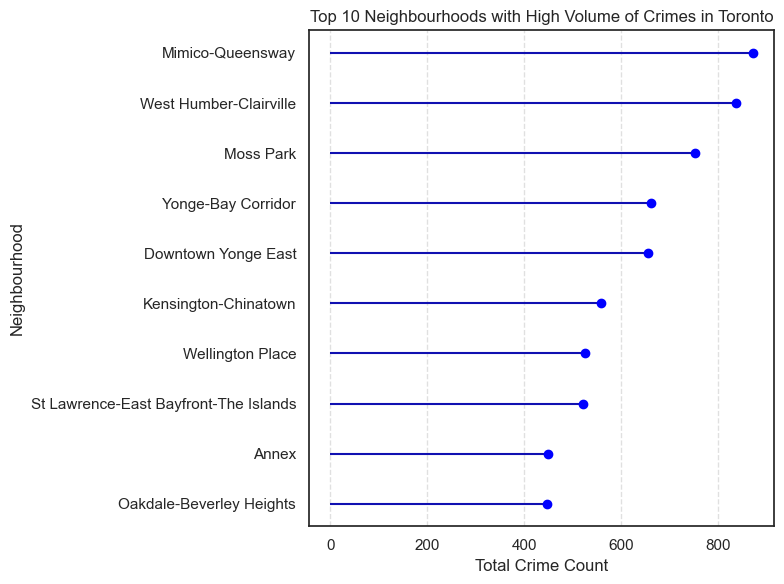

In [41]:
count_lollipop = (df_top10.groupby('AREA_NAME')['Total_Crimes'].max().sort_values())

ordered_count_lpop = count_lollipop.reset_index()
ordered_count_lpop.columns = ['AREA_NAME', 'MAX_VALUE']
my_range = range(1, len(ordered_count_lpop) + 1)

plt.figure(figsize=(8, 6))
plt.hlines(y=my_range, xmin=0, xmax=ordered_count_lpop['MAX_VALUE'], color='#1010B1')
plt.plot(ordered_count_lpop['MAX_VALUE'], my_range, "o", color='#0000FF')

plt.yticks(my_range, ordered_count_lpop['AREA_NAME'])
plt.title('Top 10 Neighbourhoods with High Volume of Crimes in Toronto', loc='center')
plt.xlabel('Total Crime Count')
plt.ylabel('Neighbourhood')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Top10_Neighbourhoods_with_High_Volume_of_Crimes_in_Total.png", dpi=300, bbox_inches='tight')
plt.show()